In [12]:
# <!---
# This program outputs the number of data packets transferred on a monthly basis through all the hotspots in a selected perimeter during the last year
# -->

import pandas as pd
import time
from datetime import date, timedelta
import requests
import json
import numpy as np
from matplotlib import pyplot as plt

dict1 = {}
dict2 = {}


# scen = "norfolkVA"
# lat = "36.848446" 
# lon = "-76.287268"

# scen = "miamiFL"
# lat = "25.856630"
# lon = "-80.278249"

# Seattle, WA: 47.604872,-122.333622
# scen = "seattleWA"
# lat = "47.604872"
# lon = "-122.333622"

#Denver, CO: 39.743418,-104.992285
# scen = "denverCO"
# lat = "39.743418"
# lon = "-104.992285"

#Topeka, KS: 39.033278,-95.681458
# scen = "topekaKS"
# lat = "39.033278"
# lon = "-95.681458"

#Rome, GA: 34.258591,-85.176021
# scen = "romeGA"
# lat = "34.258591"
# lon = "-85.176021"

#Turlock, CA: 37.506028,-120.848877
scen = "turlockCA"
lat = "37.506028"
lon = "-120.848877"


url = "https://api.helium.io/v1/hotspots/location/distance/?lat="+lat+"&lon="+lon+"&distance=32187"
dict1 = json.loads(requests.get(url).text)
dict2 = dict1

while "cursor" in dict1:
    cursor = dict1['cursor']
    url = "https://api.helium.io/v1/hotspots/location/distance/?lat="+lat+"&lon="+lon+"&distance=32187"
    url = url + "&cursor=" + cursor
    dict1 = json.loads(requests.get(url).text)
    dict2.update(dict1)
    time.sleep(1)
url = ''

minTime = []
maxTime = []
current_date = date.today()

hotspot_names = []
for num in range(len(dict2['data'])):
    hotspot_names.append(dict2['data'][num]['name'])
    
for i in range(1,13):
    maxTime.append(current_date)
    priorDate = current_date-timedelta(days=30)
    minTime.append(priorDate)
    current_date = priorDate    


dataPerAddress = {}
for i in range(len(dict2['data'])):
    dataPerAddress[dict2['data'][i]['address']] = []
print(dataPerAddress.keys())
print(len(dataPerAddress))

dict = {}
sum1 = 0
cursor = ''
for a in dataPerAddress:
    print("Current address: ", a)
    for t in range(len(minTime)):            
        url = "https://api.helium.io/v1/hotspots/"+a+"/activity/?filter_types=state_channel_close_v1&min_time="+str(minTime[t])+"T00:00:01Z&max_time="+str(maxTime[t])+"T23:59:59Z"
        dict = json.loads(requests.get(url).text)
        time.sleep(1)
        while "cursor" in dict:
            for i in range(len(dict['data'])):            
                sum1 = sum1 + dict['data'][i]['state_channel']['summaries'][0]['num_packets']
            cursor = dict['cursor']
            url = "https://api.helium.io/v1/hotspots/"+a+"/activity/?filter_types=state_channel_close_v1&min_time="+str(minTime[t])+"T00:00:01Z&max_time="+str(maxTime[t])+"T23:59:59Z"
            url = url + "&cursor=" + cursor
            dict = json.loads(requests.get(url).text)
            time.sleep(1)
        else:
            try:
                for i in range(len(dict['data'])):            
                    sum1 = sum1 + dict['data'][i]['state_channel']['summaries'][0]['num_packets']
            except:
                print("error no data key for ", a)

        dataPerAddress[a].append(sum1)
        sum1 = 0
    dataPerAddress[a].reverse()
    print(dataPerAddress[a])
    
#     plt.plot(dataPerAddress[a])
#     plt.plot(np.cumsum((dataPerAddress)[a]))
#     plt.show()
#     plt.bar(range(9), dataPerAddress[a])
#     plt.show()

# for a in range(0, len(dataPerAddress)):
   
#     plt.plot(list(dataPerAddress.values())[a])
#     if ((a+1) % 3 == 0) or (a == len(dataPerAddress)-1):
#         plt.xlabel("Weeks")
#         plt.ylabel("Rewards [HNT]")
#         plt.title("Data Packets Transferred: ")
#         plt.show()

# for a in range(0, len(dataPerAddress)):
   
#     plt.plot(np.cumsum(list(dataPerAddress.values())[a]))
#     if ((a+1) % 3 == 0) or (a == len(dataPerAddress)-1):
#         plt.xlabel("Weeks")
#         plt.ylabel("Rewards [HNT]")
#         plt.title("Cumulative Data Packets Transferred: ")
#         plt.show()
        
dict.clear()
sum1=0
cursor=''



dict_keys(['11EBq5vh6bfSqqYaW9LB8FDmQBZJ4TNCvGdNmhLM3JjpYtFM6YM', '11DZoWLr61cN4D76mqnu8hjb8Pz7y2g4m4YkB4bYPfWHmUd4K2t', '11BXqaNepqWt1h9Mt2i574NVZz2uHHL9kbGfwDL9TtZU6ZpKjZd', '112JShSZ8an4KJhmcNDcyqganRd2shYbiZvUkwKxe2xJZVh64TzQ', '11uGXbu1C4XZhQJMoBzvufjp1PrYHBudYFxHoZPR4zBFM1fn6rW', '11jqTL68ZKEDy23nQdTVfkmf2HMMxk3EyS7X4fy25jEGUCYwSjT', '11MeUgeroyj2DSzxjB7H6sUPRq2XYYAFHjmnXdUZFc7sagbfgg8', '112ttcxvdJjFF1qarMZNzxnx35gFdhXKWYj5ZpFjg5kmXJWqG8ru', '11rApJrJ1U8kCHRjqBFCyYmdapp8bHzhiCXCqLh68NttNQyRc6x', '112PWa7Cxr9KUn1RHc8eh3yQuPQdZuSNEJMsVhAX1YbJTXBwwzXM', '11JFFtHgtcxyNZAAJ3tJy8oVU2yVNQSL3LGYTZBrW1651WJsAUx', '112aqS7Dx66szaDuFJVw78D2Us2EzqaQarxoTPvmgaFUA37U8WNs', '118wa9oAQHQTU4i6UWvmjymHMeRVQGrTo7eAaAaAstyjVfKAHiS', '112UpEUxfq1bKu31auPrxeVwq72Hu3xN19or6ZiBqdeMd6UVhW5p', '11EtvsQnjyZ8TasCdAhWnK6zXgqbAt6TfoNCUwwhMUSWwT2SNjk', '117voqikEwyYiKqhxPAykU6qpzjKzkRfYSmSEvViNQTJPo9YWoP', '114S2gX9BuWpBGqm1xzC6ovHbQAiAXbwzXic1yPFAwV6cbxCwKz', '11fZh6GeeEXMNDtH7RbhSJaHW5sqyLtzEsvEh5gpuJiHDwhe

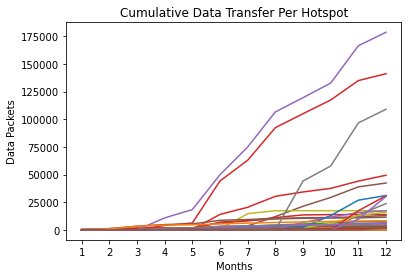

{'11EBq5vh6bfSqqYaW9LB8FDmQBZJ4TNCvGdNmhLM3JjpYtFM6YM': [0, 186, 530, 432, 189, 1712, 306, 68, 24, 2, 7, 70], '11DZoWLr61cN4D76mqnu8hjb8Pz7y2g4m4YkB4bYPfWHmUd4K2t': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '11BXqaNepqWt1h9Mt2i574NVZz2uHHL9kbGfwDL9TtZU6ZpKjZd': [0, 0, 0, 0, 0, 27, 17, 24, 7, 2, 3, 2], '112JShSZ8an4KJhmcNDcyqganRd2shYbiZvUkwKxe2xJZVh64TzQ': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], '11uGXbu1C4XZhQJMoBzvufjp1PrYHBudYFxHoZPR4zBFM1fn6rW': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '11jqTL68ZKEDy23nQdTVfkmf2HMMxk3EyS7X4fy25jEGUCYwSjT': [0, 10, 72, 658, 394, 5978, 1348, 1438, 616, 287, 103, 592], '11MeUgeroyj2DSzxjB7H6sUPRq2XYYAFHjmnXdUZFc7sagbfgg8': [0, 0, 0, 17, 2, 55, 18, 13, 7, 34, 4, 4], '112ttcxvdJjFF1qarMZNzxnx35gFdhXKWYj5ZpFjg5kmXJWqG8ru': [0, 0, 0, 317, 504, 1908, 349, 414, 36, 0, 0, 0], '11rApJrJ1U8kCHRjqBFCyYmdapp8bHzhiCXCqLh68NttNQyRc6x': [0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 1], '112PWa7Cxr9KUn1RHc8eh3yQuPQdZuSNEJMsVhAX1YbJTXBwwzXM': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '11JFFt

In [13]:
import pickle
import numpy as np

with open(scen+"_dataTransfer_20mile.pkl", 'wb') as fh:
    pickle.dump(dataPerAddress, fh)

file = open("turlockCA_dataTransfer_20mile.pkl", 'rb')
loadedDPA = pickle.load(file)
len(loadedDPA)
from matplotlib import pyplot as plt
for a in range(len(loadedDPA)):    
    plt.plot(np.cumsum(list(loadedDPA.values())[a]))
    #if ((a+1) % 3 == 0) or (a == len(dataPerAddress)-1):

plt.xticks(ticks = list(range(0,12)), labels = list(range(1,13)))
plt.xlabel("Months")
plt.ylabel("Data Packets")
plt.title("Cumulative Data Transfer Per Hotspot")
#plt.legend()
plt.show()
print(loadedDPA)

18683
12297
11568
8489
7557
6122
5550
3666
3432
3427
3350
3336
3034
2411
2195
2131
2055
1887
1798
1732
1634
1453
1438
1373
1323
1251
1209
1186
1136
1097
1087
1052
1019
988
927
920
893
794
787
776
761
755
745
745
736
658
643
558
558
515
miamiFL Number of hotspots: 166 
Monthly average for top 50 hotspots:  [334.92, 144.8, 360.1, 346.3, 14.5, 38.5, 86.0, 390.42, 440.42, 187.5, 203.74, 127.54]
33987
18127
11510
6278
3718
3492
2971
2853
2830
2227
1770
1586
1488
1478
1465
1456
1435
931
839
728
716
660
634
594
585
540
499
486
466
427
414
382
331
315
285
276
272
270
260
247
246
245
238
230
190
180
159
156
153
150
seattleWA Number of hotspots: 159 
Monthly average for top 50 hotspots:  [65.3, 86.28, 229.82, 165.26, 13.02, 106.5, 110.3, 108.52, 204.92, 438.36, 425.4, 281.82]
18463
10344
7886
6407
5827
2932
2619
2240
2139
2025
1381
1363
1276
1218
1011
997
969
752
735
726
706
687
566
564
562
548
491
491
488
475
467
443
434
418
415
406
379
349
339
332
310
306
297
296
286
281
272
265
235
234
norfol

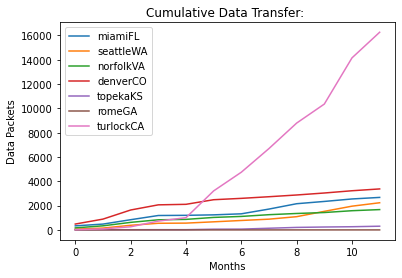

In [1]:
#This program outputs cumulative graphs of average monthly number of data packets transferred for a chosen number of hotspots, per city 
import pickle
from matplotlib import pyplot as plt
import numpy as np
scens = ["miamiFL", "seattleWA", "norfolkVA", "denverCO", "topekaKS", "romeGA", "turlockCA"]

count = 1
dict_final = {}
list_of_lists = []
num_of_hotspots = 50
for s in scens:
    file = open(s+"_dataTransfer_20mile.pkl", 'rb')
    loadedDPA = pickle.load(file)
    for key,value in loadedDPA.items():
        sum1 = sum(value)
        loadedDPA[key].append(sum1)
    loadedDPA_sorted = {k: v for k, v in sorted(loadedDPA.items(), key=lambda item: item[1][12], reverse = True)}
    dict_final.update(loadedDPA_sorted)
    
    for key in dict_final:
        if(count <= num_of_hotspots):
            list_to_plot = (dict_final[key][0:12])
            list_of_lists.append(list_to_plot)
            print(sum(list_to_plot))
        count+=1
    
    print("%s Number of hotspots: %d " % (s, len(dict_final)))
    dict_final.clear()
    list_of_averages_per_city = [0,0,0,0,0,0,0,0,0,0,0,0]
    i = 0
    while(i<=11):
        for element in list_of_lists:
            list_of_averages_per_city[i] += element[i]
        i+=1
    list_of_averages_per_city[:] = [element / num_of_hotspots for element in list_of_averages_per_city]
    print("Monthly average for top %d hotspots: " % (num_of_hotspots), list_of_averages_per_city)
    plt.plot(np.cumsum(list_of_averages_per_city), label = s)
    list_of_averages_per_city.clear()
    count = 1
    list_of_lists.clear()
plt.title("Cumulative Data Transfer: ")
plt.xlabel("Months")
plt.ylabel("Data Packets")
plt.legend()
plt.show()